# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [3]:
import datahandler

import matplotlib.pyplot as plt


dataset_id = "oslo"

data_preprocessor = datahandler.DataPreprocessorOUS(dataset_id)
data_preprocessor.execute()

data_loader = datahandler.DataLoader(dataset_id)
data_loader.execute()


Loading dataset: 100%|██████████| 6/6 [00:41<00:00,  6.85s/it]


# Plot

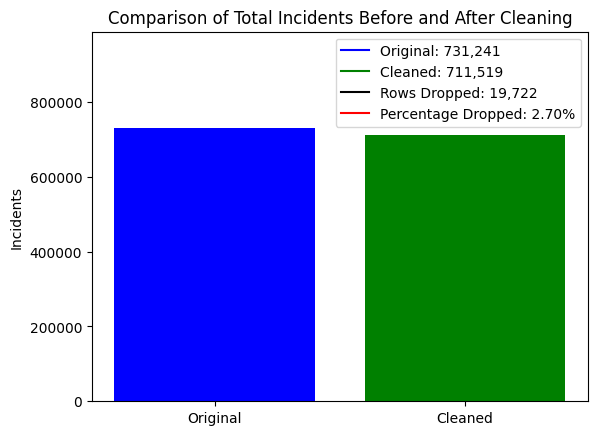

In [7]:
rows_df1 = data_loader.processed_incidents_df.shape[0]
rows_df2 = data_loader.enhanced_incidents_df.shape[0]
rows_dropped = rows_df1 - rows_df2
drop_percentage = (rows_dropped / rows_df1) * 100

# Data
labels = ['Original', 'Cleaned']
values = [rows_df1, rows_df2]

# Plot
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'green'])

# Adjust y-axis limits to provide space for the legend
ax.set_ylim(0, max(values) * 1.35)  # Extending the y-axis by 15%

# Add details to legend
handles, labels = ax.get_legend_handles_labels()
labels.append(f'Original: {rows_df1:,}')
labels.append(f'Cleaned: {rows_df2:,}')
labels.append(f'Rows Dropped: {rows_dropped:,}')
labels.append(f'Percentage Dropped: {drop_percentage:.2f}%')
# Assigning specific colors for the legend placeholders
handles.extend([
    plt.Line2D([0], [0], color='blue'),
    plt.Line2D([0], [0], color='green'),
    plt.Line2D([0], [0], color='black'),
    plt.Line2D([0], [0], color='red')
])

ax.legend(handles=handles, labels=labels)

plt.ylabel('Incidents')
plt.title('Comparison of Total Incidents Before and After Cleaning')
plt.show()


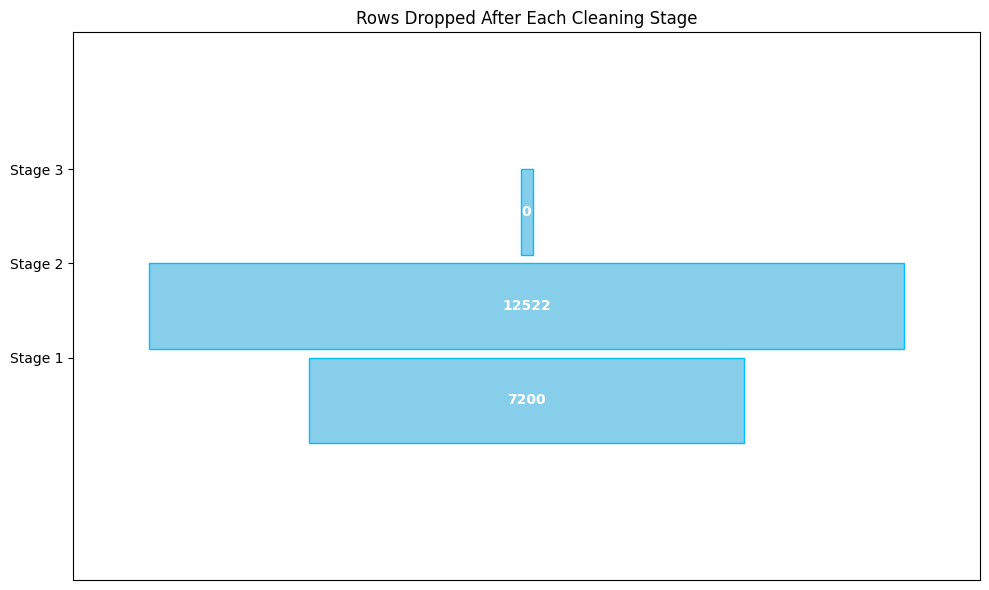

In [8]:
# Using the provided data and operations
df = data_loader.processed_incidents_df
original_count = df.shape[0]

# List to store number of rows remaining after each stage
rows_dropped = []

# Stage 1: Drop rows with NaN values in specific columns
df.dropna(subset=["time_available", "time_dispatch", "triage_impression_during_call", "time_ambulance_notified"], inplace=True)
rows_dropped.append(original_count - df.shape[0])

# Stage 2: Mask condition and filter
mask = df["time_arrival_scene"].isna() & df["time_arrival_hospital"].notna()
df = df[~mask]
rows_dropped.append(original_count - sum(rows_dropped) - df.shape[0])

# Stage 3: Another mask condition and filter
mask = df["time_departure_scene"].isna() & df["time_arrival_hospital"].notna()
df = df[~mask]
rows_dropped.append(original_count - sum(rows_dropped) - df.shape[0])

# Adjustments for the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_height = 0.1  # Reduced bar height
spacing = 0.01  # Adjusted spacing
y_val = (len(rows_dropped) - 1) * (bar_height + spacing)
min_width = 200

# Loop to plot each bar and annotate it
for i, width in enumerate(rows_dropped):
    adjusted_width = max(width, min_width)
    
    ax.barh(y_val, adjusted_width, left=-adjusted_width/2, color='skyblue', edgecolor='deepskyblue', height=bar_height)
    ax.text(0, y_val, str(width), va='center', ha='center', color='white', weight='bold')
    y_val -= (bar_height + spacing)

# Formatting the plot
ax.set_xlim((-max(rows_dropped + [min_width])/2) * 1.2, (max(rows_dropped + [min_width])/2) * 1.2)
ax.set_ylim(0 - ((bar_height + spacing) + bar_height), len(rows_dropped) * (bar_height + spacing) + bar_height)
ax.set_yticks([(i * (bar_height + spacing)) + (bar_height / 2) for i in range(len(rows_dropped))])
ax.set_yticklabels([f'Stage {i+1}' for i in range(len(rows_dropped))])
ax.set_xticks([])
ax.set_title('Rows Dropped After Each Cleaning Stage')

plt.tight_layout()
plt.show()


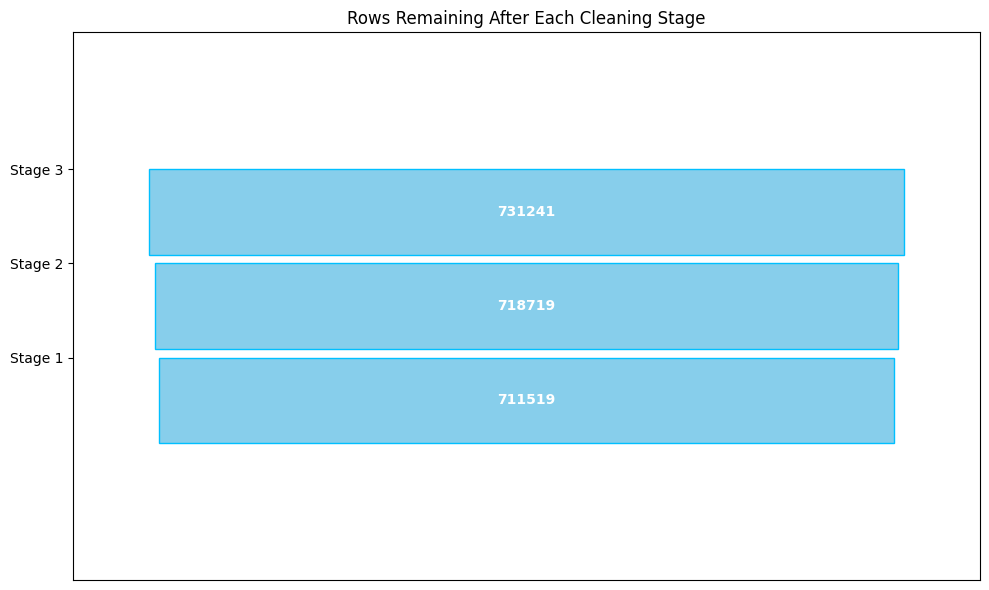

In [6]:
# Using the provided data and operations
df = data_loader.processed_incidents_df
original_count = df.shape[0]

# List to store number of rows remaining after each stage
rows_remaining = []

# Stage 1: Drop rows with NaN values in specific columns
df.dropna(subset=["time_available", "time_dispatch", "triage_impression_during_call", "time_ambulance_notified"], inplace=True)
rows_remaining.append(df.shape[0])

# Stage 2: Mask condition and filter
mask = df["time_arrival_scene"].isna() & df["time_arrival_hospital"].notna()
df = df[~mask]
rows_remaining.append(df.shape[0])

# Stage 3: Another mask condition and filter
mask = df["time_departure_scene"].isna() & df["time_arrival_hospital"].notna()
df = df[~mask]
rows_remaining.append(df.shape[0])

# Adjustments for the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_height = 0.1  # Reduced bar height
spacing = 0.01  # Adjusted spacing
y_val = (len(rows_remaining) - 1) * (bar_height + spacing)
min_width = 200

# Loop to plot each bar and annotate it
for i, width in enumerate(rows_remaining):
    adjusted_width = max(width, min_width)
    
    ax.barh(y_val, adjusted_width, left=-adjusted_width/2, color='skyblue', edgecolor='deepskyblue', height=bar_height)
    ax.text(0, y_val, str(width), va='center', ha='center', color='white', weight='bold')
    y_val -= (bar_height + spacing)

# Formatting the plot
ax.set_xlim((-max(rows_remaining + [min_width])/2) * 1.2, (max(rows_remaining + [min_width])/2) * 1.2)
ax.set_ylim(0 - ((bar_height + spacing) + bar_height), len(rows_remaining) * (bar_height + spacing) + bar_height)
ax.set_yticks([(i * (bar_height + spacing)) + (bar_height / 2) for i in range(len(rows_remaining))])
ax.set_yticklabels([f'Stage {i+1}' for i in range(len(rows_remaining))])
ax.set_xticks([])
ax.set_title('Rows Remaining After Each Cleaning Stage')

plt.tight_layout()
plt.show()
